In [1]:
"""Running basic code:
Importing packages, setting working directory, 
printing out date"""

import os as os
os.chdir('C:/Users/falco/Desktop/directory/Missing_links_in_viral_host_communities/')
import datetime as dt
str(dt.datetime.now())
from sklearn.metrics import confusion_matrix
import seaborn as sns
#from pandas_ml import ConfusionMatrix
data_path = 'C:/Users/falco/Desktop/directory/Missing_links_in_viral_host_communities/data/'
output_path = 'C:/Users/falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/'
from HPnex import functions as f
from HPnex import classification as classify
from HPnex import fitting_functions as fitt
from HPnex import multiclass_validation as multi_val

import numpy as np
import networkx as nx
#np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import model_selection
height = 6
font = 12

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
#from pandas_ml import ConfusionMatrix
from textblob import TextBlob
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import itertools as itertools
from xgboost import XGBClassifier



import pandas as pd
data = pd.read_pickle(data_path + '\species_hp_updated.pickle')
data['Virus'] = data.virus_name
data = data[data.ScientificName != 'Pelophylax ridibundus'];
data = data[data.ScientificName != 'Crocodylus moreletii']
data = data[data.ScientificName != 'unknown unknown']
data = data[data.ScientificName != 'Anaxyrus fowleri']
data = data[data.ScientificName != 'spp.']
data = data[data.ScientificName != '']
data = data[data.ScientificName != 'Sturnidae']
data = data[data.ScientificName != 'Apodemus']
data.replace('Gis Glis', 'Glis glis', inplace= True)
data.replace('Murina  aurata', 'Murina aurata', inplace= True)
data.replace('Liomys adspersus', 'Heteromys adspersus', inplace= True)
data.replace('Oreothlypis ruficapilla', 'Vermivora ruficapilla', inplace= True)
data.replace('Streptopelia chinensis', 'Spilopelia chinensis', inplace= True)
data.replace('Haemorhous mexicanus', 'Carpodacus mexicanus', inplace= True)
data.replace('Pseudalopex vetulus', 'Lycalopex vetulus', inplace= True)
data.replace('Sigmondon toltecus', 'Sigmodon toltecus', inplace= True)
data.replace('Milvago chimango', 'Milvago chimachima', inplace= True)
data.replace('Spinus tristis', 'Carduelis tristis', inplace= True)
data.replace('Alopex lagopus', 'Vulpes lagopus', inplace= True)
data.replace('Clethrionomys rufocanus', 'Myodes rufocanus', inplace= True)
data.replace('Ichthyaetus leucophthalmus', 'Larus leucophthalmus', inplace= True)
data.replace('Pan troglodyte', 'Pan troglodytes', inplace= True)
data.replace('Poecile atricapillus', 'Parus atricapillus', inplace= True)
data.replace('Poecile carolinensis', 'Parus carolinensis', inplace= True)
data.replace('Erythacus rubecula', 'Erithacus rubecula', inplace= True)
data.replace('Micoureus demerarae', 'Marmosa demerarae', inplace= True)
#data.replace('', '', inplace= True)


data['virus_name_old'] = data.virus_name
data['virus_name'] = data.species
data['VF'] = data.iloc[:,[19]]
data.drop('viral_family', axis=1, inplace= True)
data['viral_family'] = data['VF']
data.columns.get_loc('viral_family')
data.viral_family.fillna('Not_Assinged', inplace= True)

virus_df = data.groupby(
    ['virus_name', 'viral_family',
     'PubMed_Search_ln']).size().reset_index()
virus_df['group'] = np.random.randint(1, 11, virus_df.shape[0])
virus_df['group'].value_counts()
virus_df.head()

data_species_list = set(data.ScientificName.unique().tolist())
IUCN = pd.read_csv(data_path+ '\IUCN Mammals, Birds, Reptiles, and Amphibians.csv',)
IUCN["ScientificName"] = IUCN["Genus"].map(str) +' '+IUCN["Species"]
IUCN_list = set(IUCN.ScientificName.unique().tolist())
missing_names = list(data_species_list.difference(IUCN_list))
missing_names
df = pd.merge(
    data, virus_df[['virus_name', 'group']], on='virus_name', how='left')

IUCN.loc[IUCN.ScientificName== 'Homo sapiens', 'Order'] = 'Humans'
df = pd.merge(df, IUCN[['ScientificName', 'Order']], on= 'ScientificName', how='left')
df['PubMed_Search'].fillna(1, inplace = True)
df['PubMed_Search'] = df['PubMed_Search']+1

## Complete Network

In [2]:
%%time
Gc_df, Gc = f.construct_unipartite_virus_virus_network_order(
    dataframe=df,
    network_name='all_network',
    IUCN = IUCN,
    layout_func='fruchterman_reingold',
    plot=False,
    filter_file=False,
    taxonomic_filter=None,
    return_df=True)

this function is essenstial to generate species level sharing network but to add order data to the edges attributes


C:\Users\falco\Desktop\directory\Missing_links_in_viral_host_communities\HPnex\functions.py:930: FutureWarning: The default value of regex will change from True to False in a future version.
  data['ScientificName'] = data['ScientificName'].str.replace('[^\x00-\x7F]','')


we have 136503 virus pairs in our model
Wall time: 1min 35s


In [3]:
nx.write_graphml(Gc, "C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/CompleteNetwork_Order_third.graphml")

## BPnx

In [4]:
%%time
BPnx = f.construct_bipartite_host_virus_network(
    dataframe=df,
    network_name='Go',
    plot=False,
    filter_file=False,
    taxonomic_filter=None)
#nx.write_graphml(BPnx, "C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/BPnx.graphml")

Wall time: 17.7 s


In [5]:
%%time
Gc_df, Gc = f.construct_unipartite_virus_virus_network_order(
    dataframe=df,
    network_name='all_network',
    IUCN = IUCN,
    layout_func='fruchterman_reingold',
    plot=False,
    filter_file=False,
    taxonomic_filter=None,
    return_df=True)
nx.write_graphml(Gc, "C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/CompleteNetwork_Order_third.graphml")
print('Network Saved, calculating features')

this function is essenstial to generate species level sharing network but to add order data to the edges attributes
we have 136503 virus pairs in our model
Network Saved, calculating features
Wall time: 4min 40s


In [6]:
XGB1 = XGBClassifier(objective='multi:softprob',
                    random_state=42,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=True,
                    subsample=1,
                    num_class=18,
                    booster='gbtree',
                    base_score=0.5,
                    colsample_bylevel=1,
                    colsample_bytree=0.7,
                    gamma=0.1,
                    max_delta_step=0,
                    max_depth=12,
                    min_child_weight=3,
                    missing=None,
                    n_jobs=1,
                    nthread=None,
                    learning_rate=0.2, 
                    n_estimators=100,
                    )

In [7]:
XGB2 = XGBClassifier(objective='multi:softprob',
                    random_state=42,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=True,
                    subsample=1,
                    num_class=18,
                    booster='gbtree',
                    base_score=0.5,
                    colsample_bylevel=1,
                    colsample_bytree=0.7,
                    gamma=0.1,
                    max_delta_step=0,
                    max_depth=12,
                    min_child_weight=3,
                    missing=None,
                    n_jobs=1,
                    nthread=None,
                     
                    n_estimators=500,
                    learning_rate=0.2, 
                    
                    )

In [8]:
XGB3 = XGBClassifier(objective='multi:softprob',
                    random_state=42,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=True,
                    subsample=1,
                    num_class=18,
                    booster='gbtree',
                    base_score=0.5,
                    colsample_bylevel=1,
                    colsample_bytree=0.7,
                    gamma=0.1,
                    max_delta_step=0,
                    max_depth=12,
                    min_child_weight=3,
                    missing=None,
                    n_jobs=1,
                    nthread=None,
                     
                    n_estimators=500,
                    learning_rate=0.5, 
                    
                    )

In [15]:
XGB4 = XGBClassifier(objective='multi:softprob',
                    random_state=42,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=True,
                    subsample=1,
                    num_class=18,
                    booster='gbtree',
                    base_score=0.5,
                    colsample_bylevel=1,
                    colsample_bytree=0.7,
                    gamma=0.1,
                    max_delta_step=0,
                    max_depth=12,
                    min_child_weight=3,
                    missing=None,
                    n_jobs=3,
                    nthread=None,
                     
                    n_estimators=10000,
                    learning_rate=0.001, 
                    
                    )

## Running cross-validation

run_cross_validation function is in multiclass validation file
running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
this function is essenstial to generate species level sharing network but to add order data to the edges attributes


HPnex\functions.py:929: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['ScientificName'] = data['ScientificName'].str.replace('[^\x00-\x7F]','')


we have 110685 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29318 edges in complete network
we have 29318 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculate_features function is in function file 1st function
calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating node clusters
calculating if nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits
(141694, 25)

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting the model for group 3
MultiOutputClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtre

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                 precision    recall  f1-score   support

      Carnivora       0.21      0.00      0.01      1813
Cetartiodactyla       0.70      0.05      0.10     10759
     Chiroptera       0.00      0.00      0.00       201
      Cingulata       0.00      0.00      0.00         0
  Columbiformes       0.00      0.00      0.00         0
Didelphimorphia       0.00      0.00      0.00         8
   Eulipotyphla       0.00      0.00      0.00         7
         Humans       0.13      0.53      0.21      2120
     Lagomorpha       0.00      0.00      0.00         9
     No_Sharing       0.69      0.99      0.81     18888
  Passeriformes       0.00      0.00      0.00         0
 Perissodactyla       0.00      0.00      0.00      1119
         Pilosa       0.00      0.00      0.00       190
       Primates       0.29      0.06      0.10       943
    Proboscidea       0.00      0.00      0.00         0
       Rodentia       0.42      0.12      0.19      1623

      micro avg       0.55   

HPnex\multiclass_validation.py:590: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  matrix_group = pd.concat([TP, FP, FN], axis = 1)


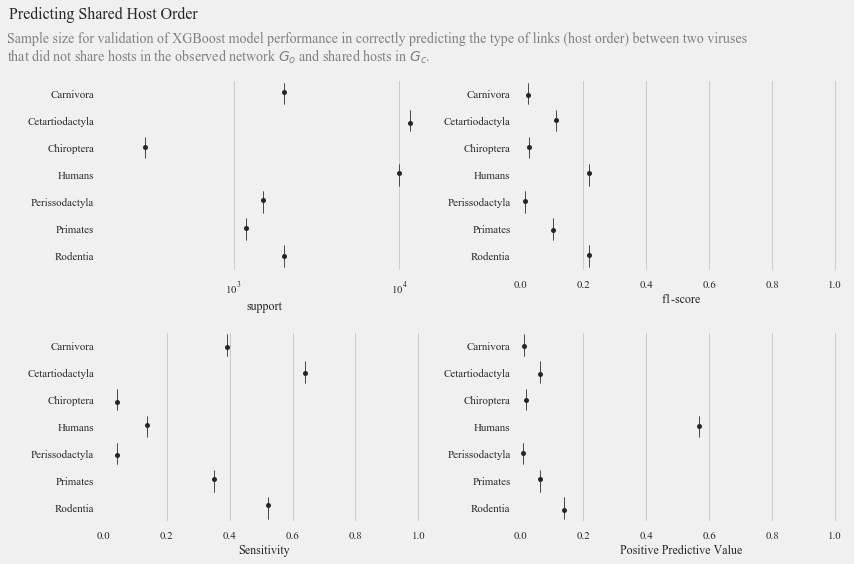

Wall time: 48min 58s


In [9]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB1,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)


matrix1 = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix1

run_cross_validation function is in multiclass validation file
running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
this function is essenstial to generate species level sharing network but to add order data to the edges attributes
we have 110685 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29318 edges in complete network
we have 29318 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculate_features function is in function file 1st function
calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centralit

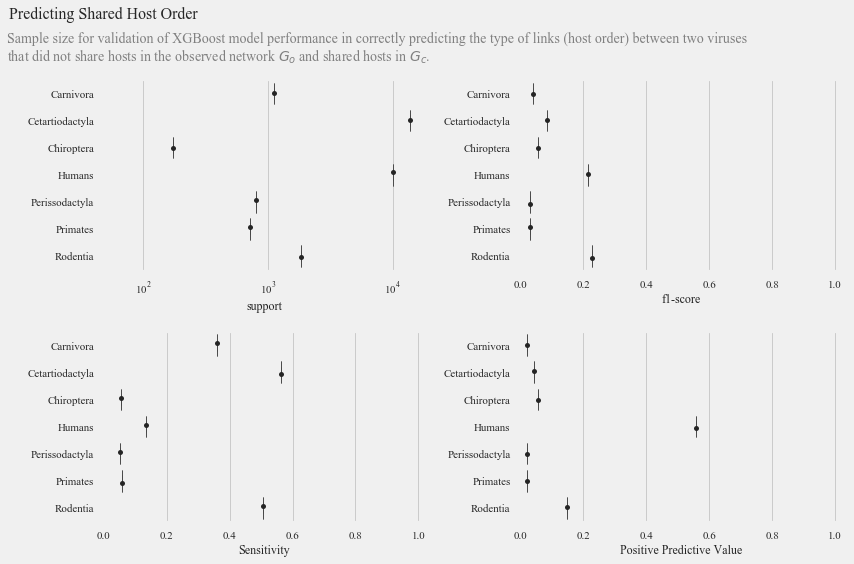

Wall time: 2h 45min 7s


In [12]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB2,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)


matrix2 = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix2

run_cross_validation function is in multiclass validation file
running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
this function is essenstial to generate species level sharing network but to add order data to the edges attributes
we have 110685 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29318 edges in complete network
we have 29318 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculate_features function is in function file 1st function
calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centralit

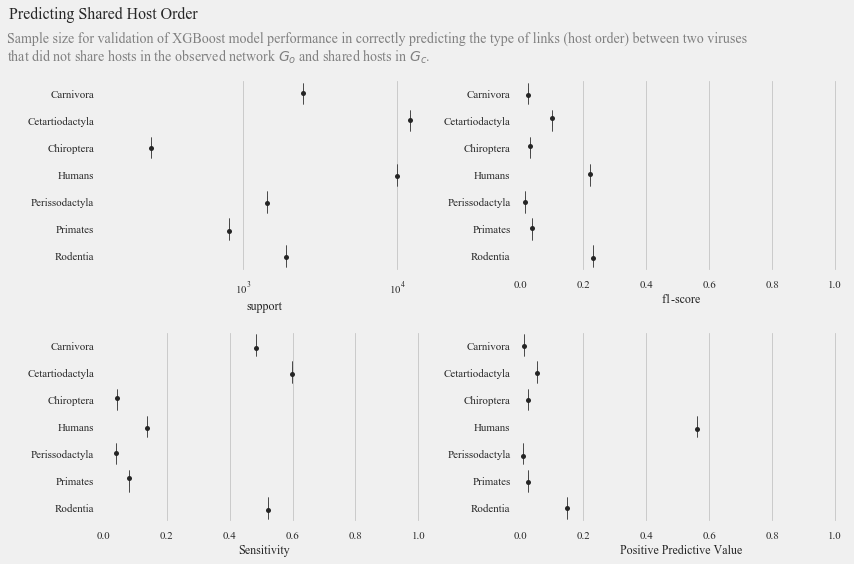

Wall time: 2h 24min 4s


In [13]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB3,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)


matrix3 = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix3

run_cross_validation function is in multiclass validation file
running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
this function is essenstial to generate species level sharing network but to add order data to the edges attributes
we have 110685 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29318 edges in complete network
we have 29318 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculate_features function is in function file 1st function
calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centralit

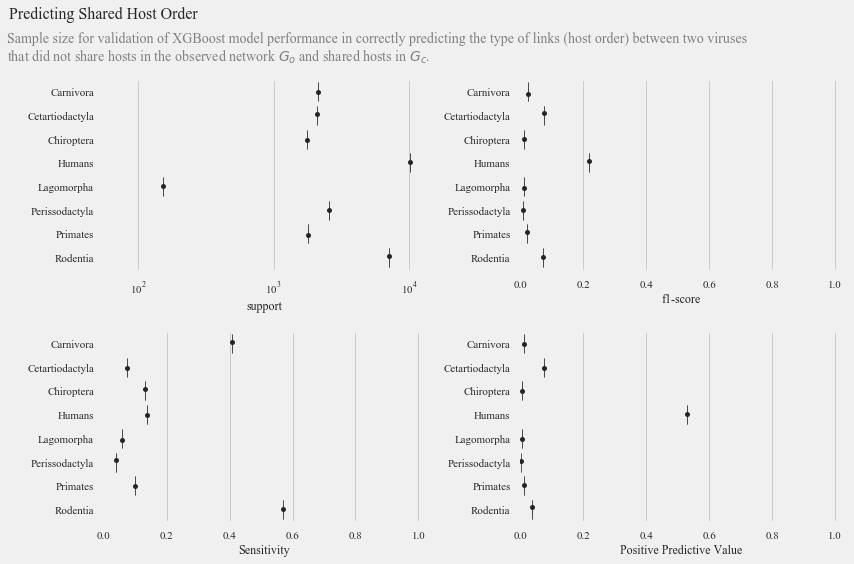

Wall time: 1d 16h 5min 13s


In [16]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB4,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)


matrix4 = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix4

In [9]:
e_group.Virus1.unique().tolist()

['Alcelaphine herpesvirus 2',
 'Alkhumra hemorrhagic fever virus',
 'Alkhurma virus',
 'Apoi virus',
 'Ateline herpesvirus 1',
 'Bebaru virus',
 'Border disease virus',
 'Borna disease virus',
 'Bovine adenovirus D',
 'Bovine foamy virus',
 'Bovine torovirus',
 'Bujaru virus',
 'Cabassou virus',
 'Catarina virus',
 'Cercopithecine herpesvirus 1',
 'Cercopithecine herpesvirus 14',
 'Cercopithecine herpesvirus 8',
 'Cercopithecine herpesvirus 9',
 'Choclo virus',
 'Classical swine fever virus',
 "Cote d'Ivoire ebolavirus",
 'Edge Hill virus',
 'Entebbe bat virus',
 'Enterovirus A',
 'Equine rhinitis B virus',
 'Equine torovirus',
 'Eubenangee virus',
 'Feline calicivirus',
 'Human adenovirus A',
 'Human adenovirus E',
 'Human adenovirus F',
 'Human coronavirus 229E',
 'Human enterovirus A',
 'Human papillomavirus 16',
 'Human papillomavirus 26',
 'Kyasanur Forest disease virus',
 'Kyasanur forest virus',
 'Lymphocytic choriomeningitis mammarenavirus',
 'Mobala mammarenavirus',
 'Mobala v

In [10]:
sorted(df[df.group == 3].Virus.unique().tolist())

['Alcelaphine herpesvirus 2',
 'Alkhumra hemorrhagic fever virus',
 'Alkhurma virus',
 'Apoi virus',
 'Ateline herpesvirus 1',
 'Bebaru virus',
 'Border disease virus',
 'Borna disease virus',
 'Bovine adenovirus D',
 'Bovine foamy virus',
 'Bovine torovirus',
 'Bujaru virus',
 'Cabassou virus',
 'Catarina virus',
 'Cercopithecine herpesvirus 1',
 'Cercopithecine herpesvirus 14',
 'Cercopithecine herpesvirus 8',
 'Cercopithecine herpesvirus 9',
 'Choclo virus',
 'Classical swine fever virus',
 "Cote d'Ivoire ebolavirus",
 'Edge Hill virus',
 'Entebbe bat virus',
 'Enterovirus A',
 'Equine rhinitis B virus',
 'Equine torovirus',
 'Eubenangee virus',
 'Feline calicivirus',
 'Human adenovirus A',
 'Human adenovirus E',
 'Human adenovirus F',
 'Human coronavirus 229E',
 'Human enterovirus A',
 'Human papillomavirus 16',
 'Human papillomavirus 26',
 'Kyasanur Forest disease virus',
 'Kyasanur forest virus',
 'Lymphocytic choriomeningitis mammarenavirus',
 'Mobala mammarenavirus',
 'Mobala v

run_cross_validation function is in multiclass validation file
running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
this function is essenstial to generate species level sharing network but to add order data to the edges attributes


HPnex\functions.py:929: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['ScientificName'] = data['ScientificName'].str.replace('[^\x00-\x7F]','')


we have 112575 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 30359 edges in complete network
we have 30359 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculate_features function is in function file 1st function
calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating node clusters
calculating if nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits
(144368, 25)

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting the model for group 3
MultiOutputClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtre

(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12)
cross_validation_predict function is in multiclass validation file
this function is in multiclass validation file
(475, 12

HPnex\multiclass_validation.py:578: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  matrix_group = pd.concat([TP, FP, FN], axis = 1)


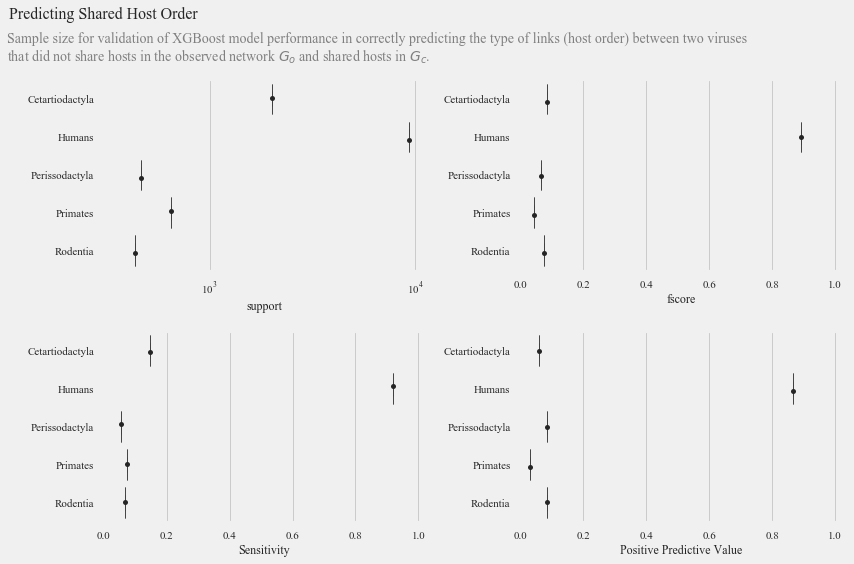

Wall time: 32min 28s


In [8]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB2,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)


matrix = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix

In [13]:
XGB3 = XGBClassifier(learning_rate=0.01,
                    n_estimators=100,
                    max_depth=10,
                    min_child_weight=6,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    reg_alpha=0.005,
                    objective='multi:softprob',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=42,
                    num_class=18)

In [14]:
df.group.unique()

array([ 1.,  8.,  9.,  3.,  4.,  6.,  2.,  7.,  5., 10., nan])

running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
we have 114003 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 31775 edges in complete network
we have 31775 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting the model for group 3
Multi

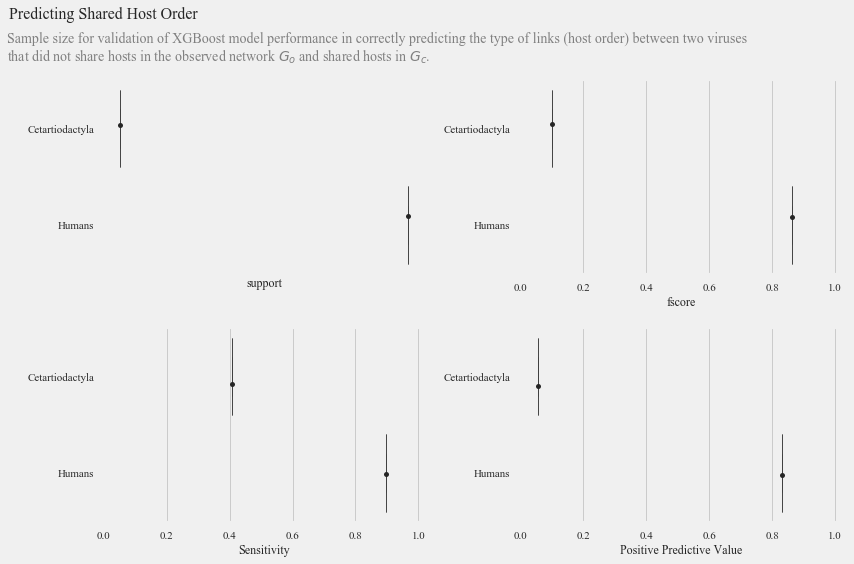

Wall time: 1h 2min 41s


In [15]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB2,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)
matrix = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix

running model for group 3
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3
we have 114003 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 31775 edges in complete network
we have 31775 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting the model for group 3
Multi

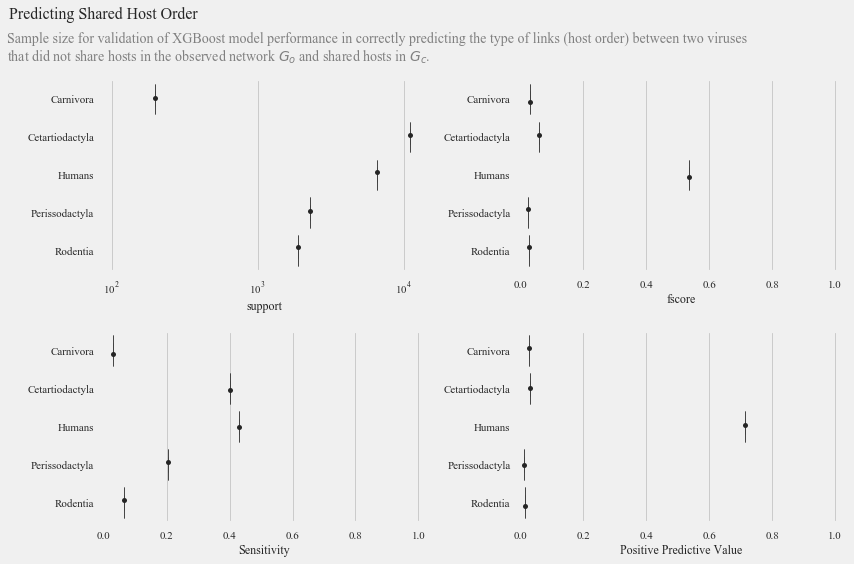

Wall time: 55min 42s


In [16]:
%%time
r_group, e_group = multi_val.run_cross_validation(i=3,
                                                  df=df,
                                                  XGB=XGB3,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)
matrix = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=3,
                                  plot=True)
matrix

cross validation 1.0



running model for group 1.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 1.0
we have 113050 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29539 edges in complete network
we have 29539 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

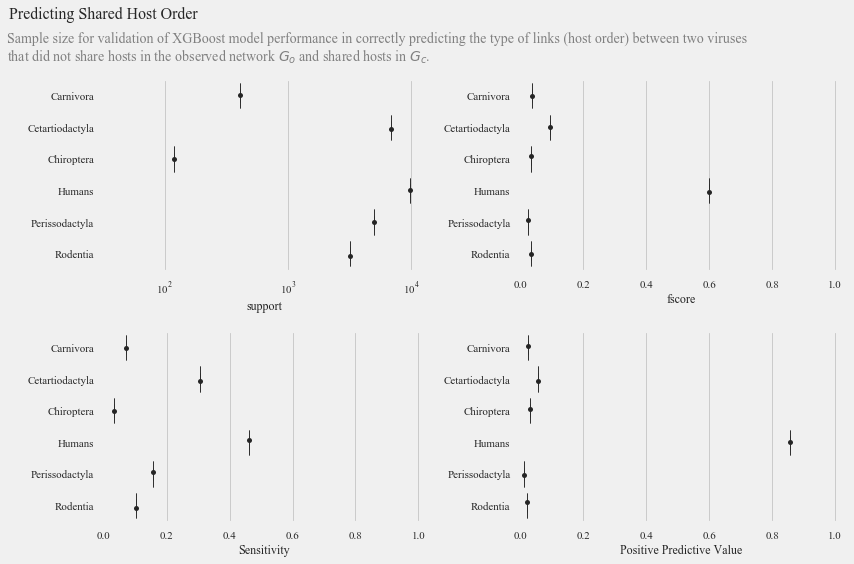

cross validation 8.0



running model for group 8.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 8.0
we have 111628 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 30101 edges in complete network
we have 30101 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

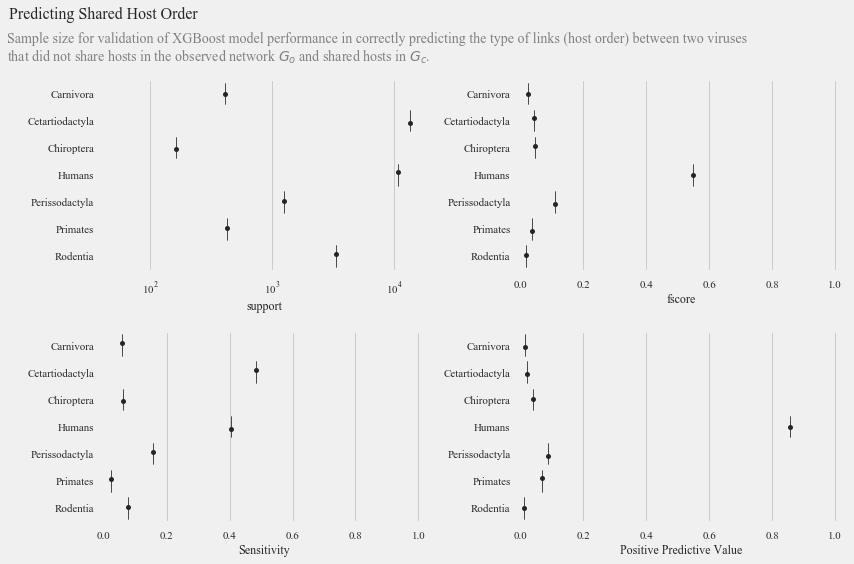

cross validation 9.0



running model for group 9.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 9.0
we have 112575 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29522 edges in complete network
we have 29522 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

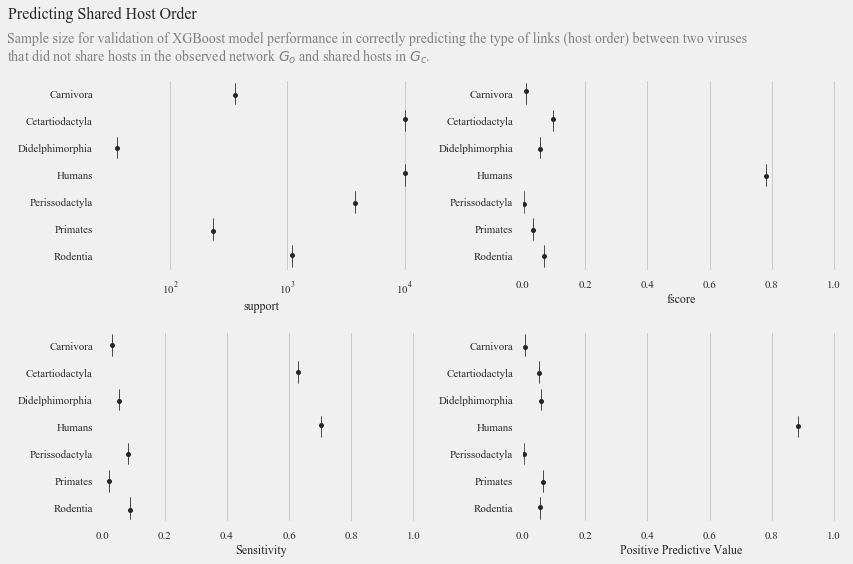

cross validation 3.0



running model for group 3.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 3.0
we have 114003 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 31775 edges in complete network
we have 31775 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

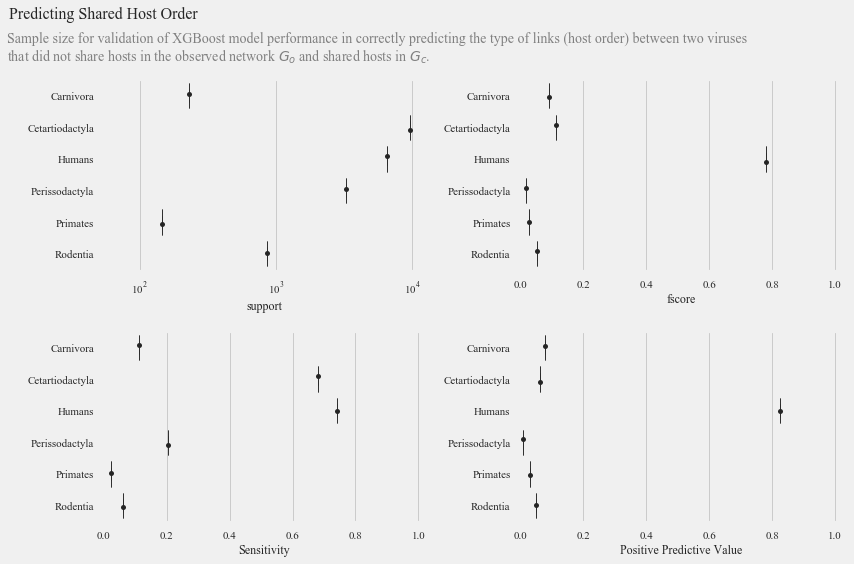

cross validation 4.0



running model for group 4.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 4.0
we have 114960 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29391 edges in complete network
we have 29391 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

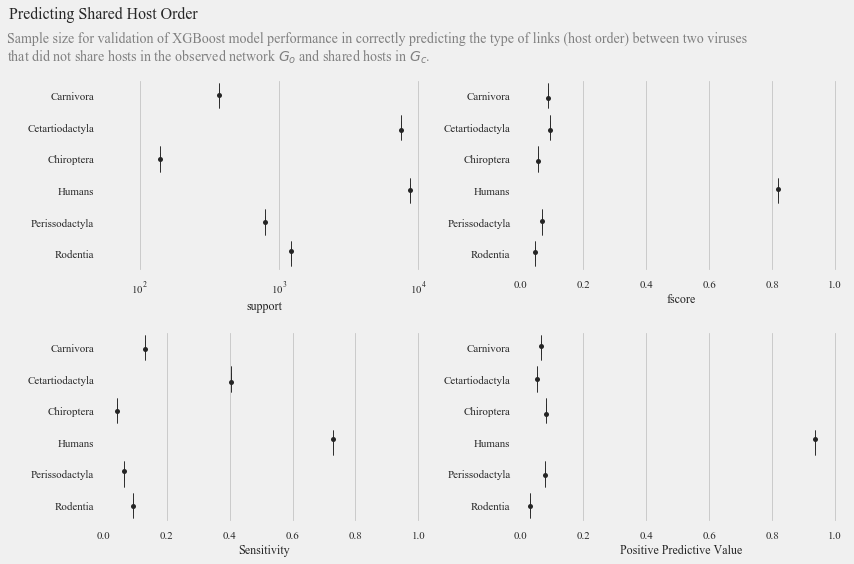

cross validation 6.0



running model for group 6.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 6.0
we have 111156 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29717 edges in complete network
we have 29717 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

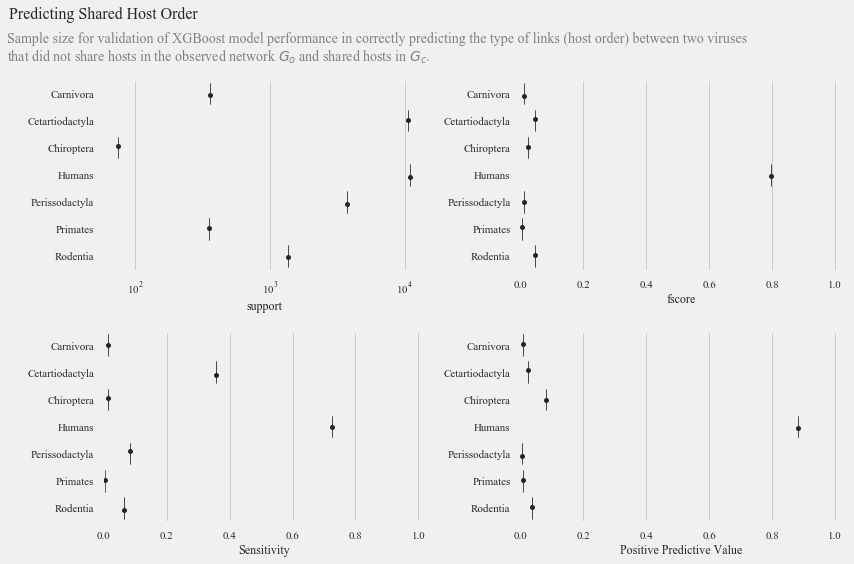

cross validation 2.0



running model for group 2.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 2.0
we have 113526 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 30895 edges in complete network
we have 30895 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

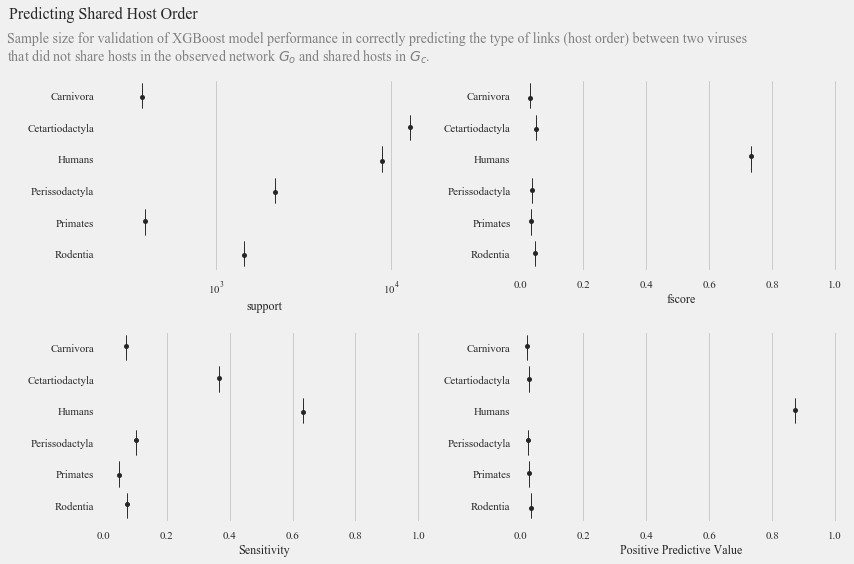

cross validation 7.0



running model for group 7.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 7.0
we have 111156 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29895 edges in complete network
we have 29895 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

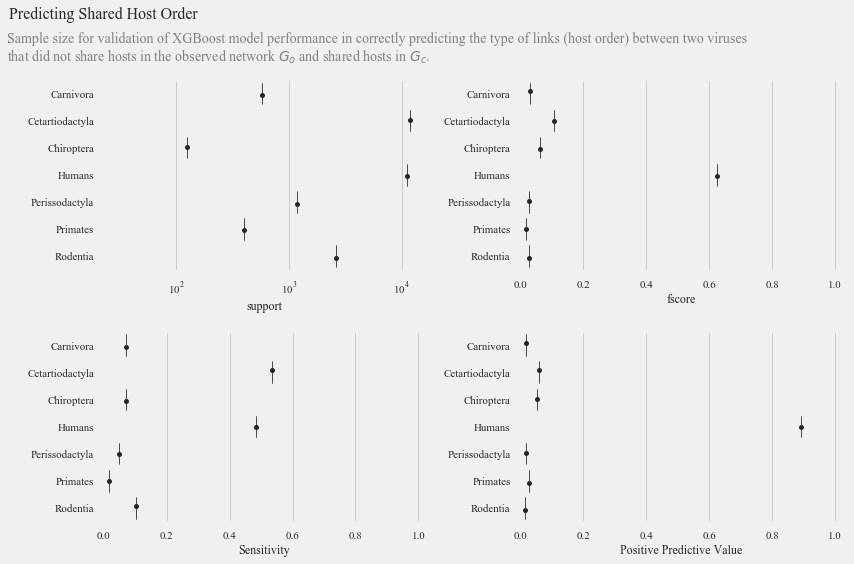

cross validation 5.0



running model for group 5.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 5.0
we have 112575 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 29688 edges in complete network
we have 29688 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

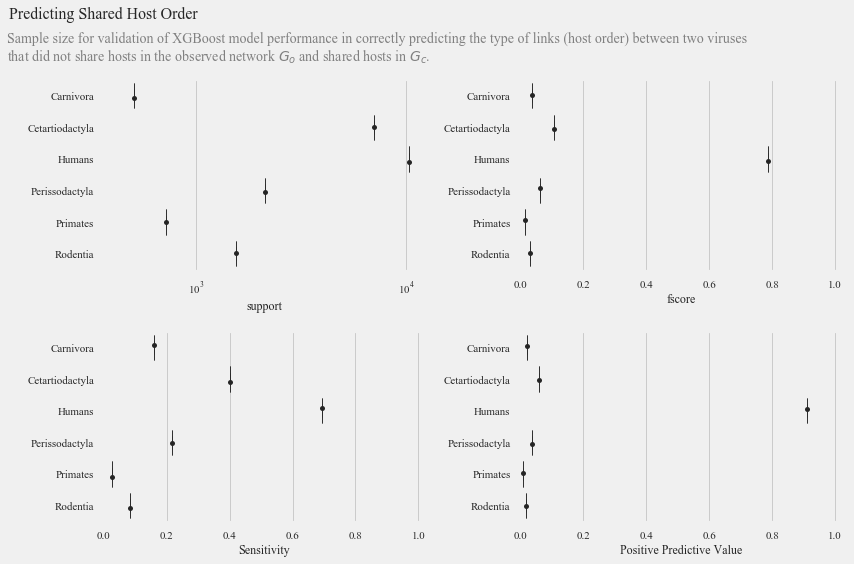

cross validation 10.0



running model for group 10.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 10.0
we have 112101 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 28779 edges in complete network
we have 28779 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitt

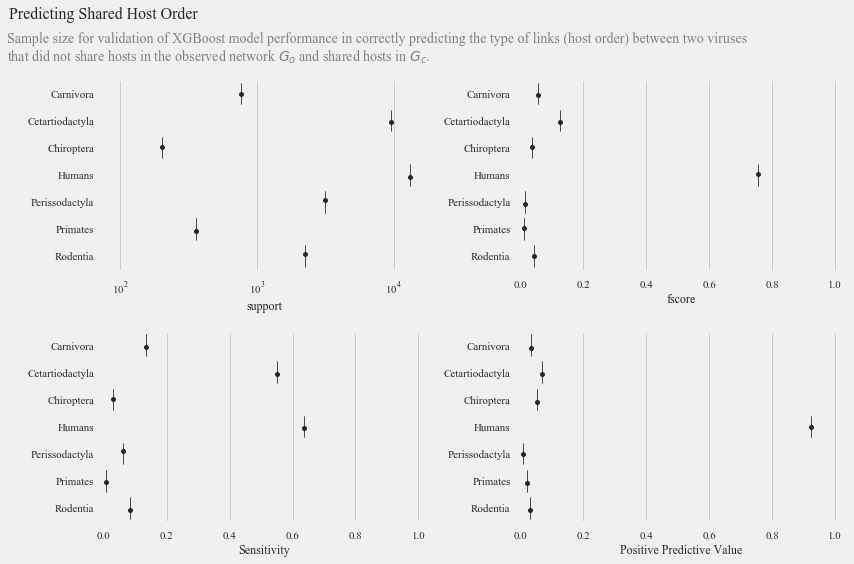

cross validation 0.0



running model for group 0.0
first construct bipartite network to reterive original data information about shared hosts
generation of observed network after removing group 0.0
we have 136503 virus pairs in our model
getting network data for Observed network using Gc and BPnx_group
we have 35838 edges in complete network
we have 35838 edges in observed network 
COMPLETE network

Develop Dataset for the Go

getting Order and Family values for shared hosts

Calculating topographical features for 'Go'

calculating topographical features
calculating Jaccard coefficients
calculating shortest path length
calculating adamic/adar index
calculating Resource coefficients
calculating preferential attachment coefficients
calculating difference in betweenness centrality
calculating is nodes are in a same cluster
calculating difference in degree
Matching Virus Families
difference in PubMed hits

Generating model data lables for 'Go'

preprocessing data for fitting model
fitting

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [17]:
%%time
cv_preds = []
cv_epreds = []
matrices = []
for i in df['group'].dropna().unique():
    print ('cross validation ' +str(i)+'\n\n\n')
    r_group, e_group = multi_val.run_cross_validation(i=i,
                                                  df=df,
                                                  XGB=XGB,
                                                  data_path=data_path,
                                                  virus_df=virus_df,
                                                  IUCN=IUCN)
    matrix = multi_val.generate_score(cv_preds=r_group,
                                  cv_epreds=e_group,
                                  virus_df=virus_df,
                                  i=i,
                                  plot=True)
    cv_preds.append(r_group)
    cv_epreds.append(e_group)
    matrices.append(matrix)
cv_preds = pd.concat(cv_preds, axis=0)
cv_epreds = pd.concat(cv_epreds, axis=0)
matrices = pd.concat(matrices, axis=0)

In [18]:
cv_preds = pd.concat(cv_preds, axis=0)
cv_epreds = pd.concat(cv_epreds, axis=0)
matrices = pd.concat(matrices, axis=0)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


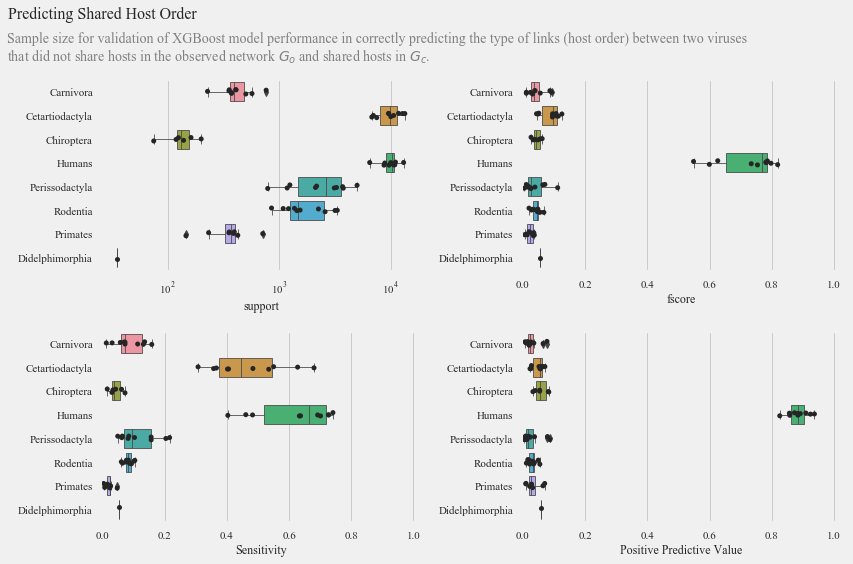

In [19]:
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Times New Roman'


sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 0.8})
validation_matrix = matrices
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2,  figsize = [12,8], sharey= False)

sns.boxplot(x="support", y="Order", data=validation_matrix.dropna(), ax = ax1)
sns.stripplot(x="support", y="Order", data=validation_matrix.dropna(), jitter= True, color='#252525', ax= ax1)
ax1.set_xlabel('support')
ax1.set_title('Predicting Shared Host Order\n\n\n', horizontalalignment = 'center', loc = 'left', fontsize=16)
text1 = 'Sample size for validation of XGBoost model performance in correctly predicting the type of links (host order) between two viruses\nthat did not share hosts in the observed network '+ r'$G_o$'+ ' and shared hosts in '+ r'$G_c$'+'.\n'
ax1.text(-0.3, 0.99, text1, verticalalignment='bottom', 
         horizontalalignment='left',
         transform=ax1.transAxes,
         color='gray', fontsize=14)
ax1.set_xscale('log')
ax1.set_ylabel('')

sns.boxplot(x="f1-score", y="Order", data=validation_matrix.dropna(), ax = ax2)
sns.stripplot(x="f1-score", y="Order", data=validation_matrix.dropna(), jitter= True, color='#252525', ax= ax2)
ax2.set_xlabel('fscore')
ax2.set_xlim(0,1.02)
ax2.set_ylabel('')


sns.boxplot(x="Sensitivity", y="Order", data=validation_matrix.dropna(), ax = ax3)
sns.stripplot(x="Sensitivity", y="Order", data=validation_matrix.dropna(), jitter= True, color='#252525', ax= ax3)
ax3.set_xlim(0,1.02)
ax3.set_xlabel('Sensitivity')
ax3.set_ylabel('')

sns.boxplot(x="PPV", y="Order", data=validation_matrix.dropna(), ax = ax4)
sns.stripplot(x="PPV", y="Order", data=validation_matrix.dropna(), jitter= True, color='#252525', ax= ax4)
ax4.set_xlim(0,1.02)
ax4.set_xlabel('Positive Predictive Value')
ax4.set_ylabel('')
plt.tight_layout()
plt.savefig('outputs/XGBoost_order_prediction_performance_4rd_validation.png', dpi = 600)

In [20]:
cv_preds.to_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/multi_cv_preds_xgb.pickle')
cv_epreds.to_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/multi_cv_epreds_xgb.pickle')

In [21]:
matrices.to_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/multi_cv_matrix_xgb.pickle')